In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

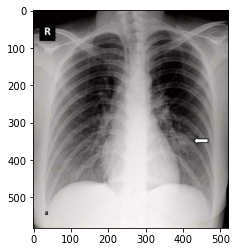

In [2]:
im = cv2.imread('Data/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png')
plt.imshow(im)

In [3]:
directory = 'Data'

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
import tensorflow as tf

Using TensorFlow backend.


In [5]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        'Data',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        'Data',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [8]:
R = classifier.fit(
        train_generator,
        steps_per_epoch=200,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=800)

Epoch 1/10
199/200 [============================>.] - ETA: 1s - loss: 0.2115 - accuracy: 0.9266

KeyboardInterrupt: 

In [ ]:
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()